# Preparing the Dataset

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
plt.style.use('ggplot')
import seaborn as sns

In [2]:
# Kept the original dataset
listingsNYC = pd.read_csv('listings.csv', dtype=object)
listingsNYC

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,5136,"Spacious Brooklyn Duplex, Patio + Garden",7378,Rebecca,Brooklyn,Sunset Park,40.66265,-73.99454,Entire home/apt,275,21,3,2022-08-10,0.03,1,267,1,NaN
1,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.8038,-73.96751,Private room,75,2,118,2017-07-21,0.73,1,0,0,NaN
2,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68535,-73.95512,Private room,60,30,50,2019-12-02,0.30,2,322,0,NaN
3,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Midtown,40.76457,-73.98317,Private room,68,2,559,2022-11-20,3.38,1,79,50,NaN
4,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75356,-73.98559,Entire home/apt,175,30,49,2022-06-21,0.31,3,365,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41528,771962449581256963,Romántico y natural,421601513,Juan Carlos,Manhattan,Washington Heights,40.84727072881559,-73.94341916084775,Private room,80,5,0,NaN,NaN,3,358,0,NaN
41529,771967712456918474,Sunset Park Studio Sublet,326495,Laura Adriana,Brooklyn,Sunset Park,40.63832893587064,-74.01671019409663,Entire home/apt,42,30,0,NaN,NaN,3,89,0,NaN
41530,771971759808918693,9B5B Townhouse w/ Elevator & Private Entrance,316920152,Allison,Manhattan,Murray Hill,40.74690169639175,-73.97826030246593,Entire home/apt,3888,2,0,NaN,NaN,8,365,0,NaN
41531,771971822371481471,Huge 9B5B Townhouse w Elevator & Private Entr...,484979380,Natasha,Manhattan,Murray Hill,40.74959584319043,-73.98079769535242,Entire home/apt,3888,2,0,NaN,NaN,2,364,0,NaN


In [3]:
# Dropping all of the columns which we will not use
# listingsNYC= listingsNYC.drop(['last_review','license','latitude','longitude','host_name'], axis=1)

# Dropping all rows with any 'Nan' values in them
# listingsNYC.dropna(axis=0, how='any', inplace=True)
data_types_dict = {
    'price':'int64', 
    'minimum_nights':'int64', 
    'host_id':str,
    'number_of_reviews':'int64',
    'reviews_per_month':float,
    'calculated_host_listings_count':'int64',
    'availability_365':'int64',
    'number_of_reviews_ltm':'int64'}

#changing all the datatype to their respective types that we can work with
listingsNYC = listingsNYC.astype(data_types_dict)

# creating a price per stay (ppn) column with the price and minimim nights columns and rounding to 2 decimal places. 
# This is a float dtype 
listingsNYC['pps'] = (listingsNYC['price'] * listingsNYC['minimum_nights']).round(2)
listingsNYC['neighbourhood'].unique().shape[0]
listingsNYC.describe()
listingsNYC['annual_revenue'] = (365 - listingsNYC['availability_365']) *  listingsNYC['price']
listingsNYC.describe()
# listingsNYC['price_bin'] = pd.cut(listingsNYC['price'], bins=range(0, 111, 10), right=False, labels=range(0, 110, 10))

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,pps,annual_revenue
count,41533.000000,41533.000000,41533.000000,32140.000000,41533.000000,41533.000000,41533.000000,4.153300e+04,4.153300e+04
mean,221.978282,18.592204,26.204994,1.279287,20.626803,143.287771,7.983700,3.313718e+03,4.429227e+04
std,919.502236,30.699921,56.178847,1.935098,68.874393,144.279510,18.563894,1.916310e+04,2.855034e+05
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000,0.000000e+00,0.000000e+00
25%,80.000000,2.000000,1.000000,0.140000,1.000000,0.000000,0.000000,3.480000e+02,8.000000e+03
50%,131.000000,10.000000,5.000000,0.580000,1.000000,87.000000,1.000000,1.332000e+03,2.555000e+04
75%,220.000000,30.000000,25.000000,1.880000,4.000000,312.000000,8.000000,3.600000e+03,4.992000e+04
max,98159.000000,1250.000000,1666.000000,102.980000,487.000000,365.000000,992.000000,2.253600e+06,3.129119e+07


In [4]:
listingsNYC_no_outlier = listingsNYC.copy(deep=True)
listingsNYC_no_outlier = listingsNYC_no_outlier.loc[(listingsNYC['price'] - listingsNYC['price'].mean()).abs() / listingsNYC['price'].std() < .5]
listingsNYC_no_outlier

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,pps,annual_revenue
0,5136,"Spacious Brooklyn Duplex, Patio + Garden",7378,Rebecca,Brooklyn,Sunset Park,40.66265,-73.99454,Entire home/apt,275,21,3,2022-08-10,0.03,1,267,1,NaN,5775,26950
1,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.8038,-73.96751,Private room,75,2,118,2017-07-21,0.73,1,0,0,NaN,150,27375
2,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68535,-73.95512,Private room,60,30,50,2019-12-02,0.30,2,322,0,NaN,1800,2580
3,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Midtown,40.76457,-73.98317,Private room,68,2,559,2022-11-20,3.38,1,79,50,NaN,136,19448
4,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75356,-73.98559,Entire home/apt,175,30,49,2022-06-21,0.31,3,365,1,NaN,5250,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41525,772714221060214808,Good Vibes at The Bronx,421264574,Aridio,Bronx,Unionport,40.828074,-73.847886,Entire home/apt,125,2,0,NaN,NaN,1,60,0,NaN,250,38125
41527,771961589340472067,Habitación Privada,409771624,Camila,Queens,Sunnyside,40.742223,-73.92331,Private room,124,2,0,NaN,NaN,1,360,0,NaN,248,620
41528,771962449581256963,Romántico y natural,421601513,Juan Carlos,Manhattan,Washington Heights,40.84727072881559,-73.94341916084775,Private room,80,5,0,NaN,NaN,3,358,0,NaN,400,560
41529,771967712456918474,Sunset Park Studio Sublet,326495,Laura Adriana,Brooklyn,Sunset Park,40.63832893587064,-74.01671019409663,Entire home/apt,42,30,0,NaN,NaN,3,89,0,NaN,1260,11592


In [5]:
listingsNYC_no_outlier.describe()
listingsNYC_no_outlier['price_bin'] = pd.cut(listingsNYC_no_outlier['price'], bins=range(0, 701, 20), right=False, labels=range(0, 700, 20))
listingsNYC_no_outlier


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,pps,annual_revenue,price_bin
0,5136,"Spacious Brooklyn Duplex, Patio + Garden",7378,Rebecca,Brooklyn,Sunset Park,40.66265,-73.99454,Entire home/apt,275,...,3,2022-08-10,0.03,1,267,1,NaN,5775,26950,260
1,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.8038,-73.96751,Private room,75,...,118,2017-07-21,0.73,1,0,0,NaN,150,27375,60
2,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68535,-73.95512,Private room,60,...,50,2019-12-02,0.30,2,322,0,NaN,1800,2580,60
3,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Midtown,40.76457,-73.98317,Private room,68,...,559,2022-11-20,3.38,1,79,50,NaN,136,19448,60
4,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75356,-73.98559,Entire home/apt,175,...,49,2022-06-21,0.31,3,365,1,NaN,5250,0,160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41525,772714221060214808,Good Vibes at The Bronx,421264574,Aridio,Bronx,Unionport,40.828074,-73.847886,Entire home/apt,125,...,0,NaN,NaN,1,60,0,NaN,250,38125,120
41527,771961589340472067,Habitación Privada,409771624,Camila,Queens,Sunnyside,40.742223,-73.92331,Private room,124,...,0,NaN,NaN,1,360,0,NaN,248,620,120
41528,771962449581256963,Romántico y natural,421601513,Juan Carlos,Manhattan,Washington Heights,40.84727072881559,-73.94341916084775,Private room,80,...,0,NaN,NaN,3,358,0,NaN,400,560,80
41529,771967712456918474,Sunset Park Studio Sublet,326495,Laura Adriana,Brooklyn,Sunset Park,40.63832893587064,-74.01671019409663,Entire home/apt,42,...,0,NaN,NaN,3,89,0,NaN,1260,11592,40


In [20]:
price_bin_grouping_mean = listingsNYC_no_outlier.groupby('price_bin').mean()
price_bin_grouping

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,pps,annual_revenue
price_bin,,,,,,,,,
0,5.780000,15.000000,26.560000,1.584286,5.280000,10.740000,6.900000,142.340000,1999.140000
20,33.702842,38.627907,9.538114,0.469333,105.533592,94.225452,1.613049,1299.540698,9034.689276
40,49.005537,24.566574,20.932545,0.844727,19.997483,109.628241,4.671785,1180.115782,12484.424113
60,68.804182,19.769331,27.805925,1.206661,5.441952,127.730124,7.457199,1350.592464,16305.754738
80,89.042448,17.918266,31.401219,1.332407,5.561752,132.491082,8.818243,1586.920524,20644.782795
100,107.222774,19.408602,30.565205,1.301031,9.915081,141.234353,8.570995,2069.306314,23860.771161
120,127.447603,19.432386,27.419753,1.266648,11.171978,148.110537,8.225380,2472.383290,27578.994832
140,148.699002,18.623206,29.404242,1.235925,8.632876,141.894261,7.851528,2764.191516,33174.485340
160,169.112418,16.949455,30.512854,1.353573,9.457081,151.692375,9.055773,2862.016122,36096.935948


Text(0, 0.5, 'Average Annual Revenue')

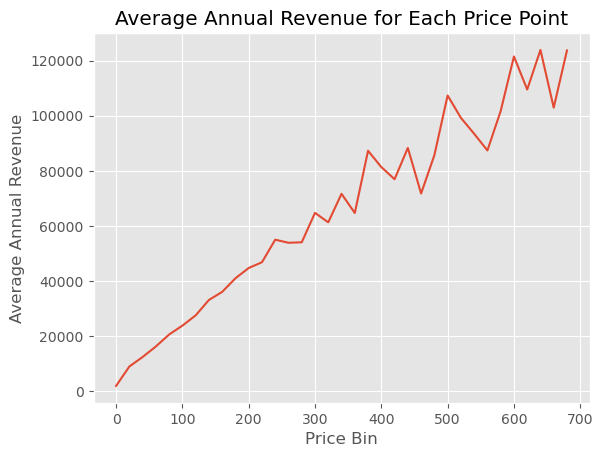

In [23]:
sns.lineplot(x = price_bin_grouping_mean.index, y = 'annual_revenue', data=price_bin_grouping_mean)
plt.title('Average Annual Revenue for Each Price Point')
plt.xlabel('Price Bin')
plt.ylabel('Average Annual Revenue')

In [24]:
brooklyn = listingsNYC_no_outlier[listingsNYC_no_outlier['neighbourhood_group']=='Brooklyn']
manhattan = listingsNYC_no_outlier[listingsNYC_no_outlier['neighbourhood_group']=='Manhattan']
queens = listingsNYC_no_outlier[listingsNYC_no_outlier['neighbourhood_group']=='Queens']
bronx = listingsNYC_no_outlier[listingsNYC_no_outlier['neighbourhood_group']=='Bronx']
staten_island = listingsNYC_no_outlier[listingsNYC_no_outlier['neighbourhood_group']=='Staten Island']

In [25]:
brooklyn_price_bin_grouping_mean = brooklyn.groupby('price_bin').mean()
manhattan_price_bin_grouping_mean = manhattan.groupby('price_bin').mean()
queens_price_bin_grouping_mean = queens.groupby('price_bin').mean()
bronx_price_bin_grouping_mean = bronx.groupby('price_bin').mean()
staten_island_price_bin_grouping_mean = staten_island.groupby('price_bin').mean()

Text(0, 0.5, 'Average Annual Revenue')

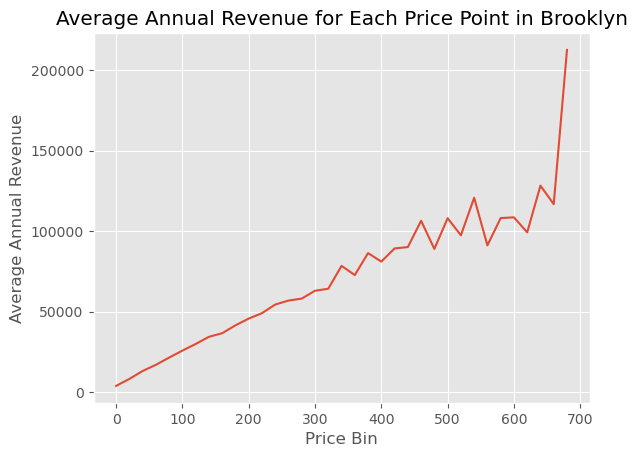

In [26]:
sns.lineplot(x = price_bin_grouping.index, y = 'annual_revenue', data=brooklyn_price_bin_grouping_mean)
plt.title('Average Annual Revenue for Each Price Point in Brooklyn')
plt.xlabel('Price Bin')
plt.ylabel('Average Annual Revenue')

Text(0, 0.5, 'Average Annual Revenue')

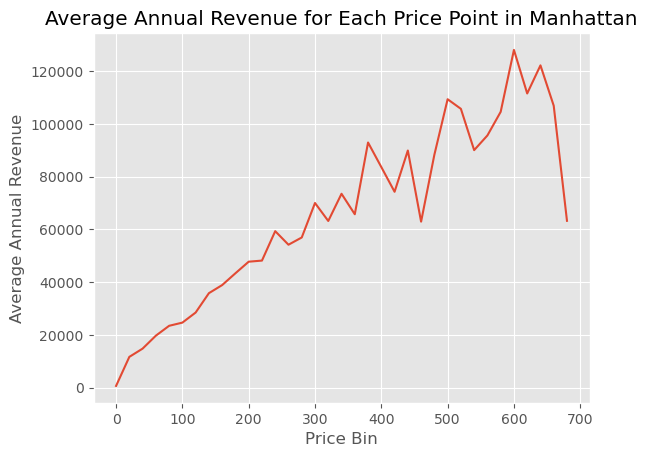

In [27]:
sns.lineplot(x = price_bin_grouping.index, y = 'annual_revenue', data=manhattan_price_bin_grouping_mean)
plt.title('Average Annual Revenue for Each Price Point in Manhattan')
plt.xlabel('Price Bin')
plt.ylabel('Average Annual Revenue')

Text(0, 0.5, 'Average Annual Revenue')

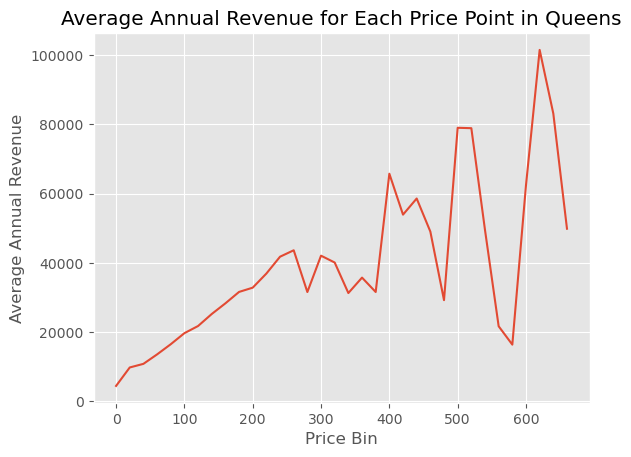

In [28]:
sns.lineplot(x = price_bin_grouping.index, y = 'annual_revenue', data=queens_price_bin_grouping_mean)
plt.title('Average Annual Revenue for Each Price Point in Queens')
plt.xlabel('Price Bin')
plt.ylabel('Average Annual Revenue')

Text(0, 0.5, 'Average Annual Revenue')

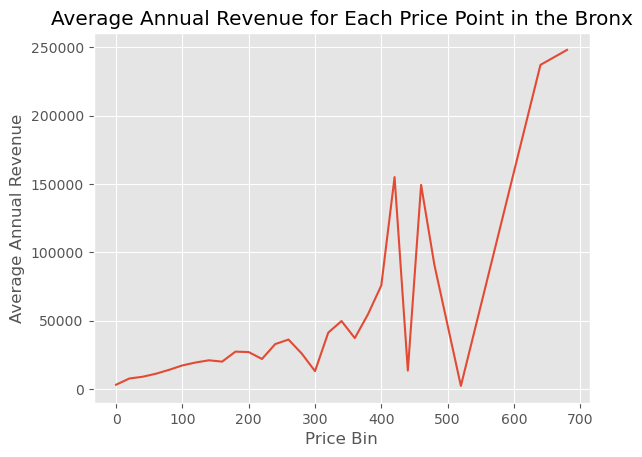

In [29]:
sns.lineplot(x = price_bin_grouping.index, y = 'annual_revenue', data=bronx_price_bin_grouping_mean)
plt.title('Average Annual Revenue for Each Price Point in the Bronx')
plt.xlabel('Price Bin')
plt.ylabel('Average Annual Revenue')

Text(0, 0.5, 'Average Annual Revenue')

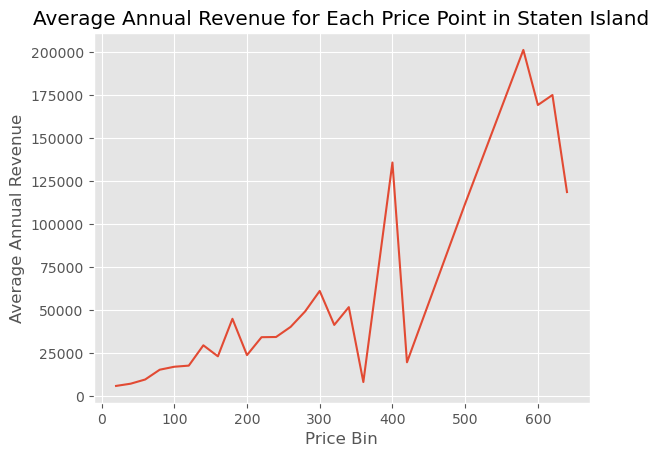

In [30]:
sns.lineplot(x = price_bin_grouping.index, y = 'annual_revenue', data=staten_island_price_bin_grouping_mean)
plt.title('Average Annual Revenue for Each Price Point in Staten Island')
plt.xlabel('Price Bin')
plt.ylabel('Average Annual Revenue')

In [43]:
price_bin_grouping_count = listingsNYC_no_outlier.groupby('price_bin').count()
price_bin_grouping_count = price_bin_grouping_count['id']
price_bin_grouping_mean['count'] = price_bin_grouping_count
price_bin_grouping = price_bin_grouping_mean
price_bin_grouping

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,pps,annual_revenue,count
price_bin,,,,,,,,,,
0,5.780000,15.000000,26.560000,1.584286,5.280000,10.740000,6.900000,142.340000,1999.140000,50
20,33.702842,38.627907,9.538114,0.469333,105.533592,94.225452,1.613049,1299.540698,9034.689276,1548
40,49.005537,24.566574,20.932545,0.844727,19.997483,109.628241,4.671785,1180.115782,12484.424113,3973
60,68.804182,19.769331,27.805925,1.206661,5.441952,127.730124,7.457199,1350.592464,16305.754738,4591
80,89.042448,17.918266,31.401219,1.332407,5.561752,132.491082,8.818243,1586.920524,20644.782795,4429
100,107.222774,19.408602,30.565205,1.301031,9.915081,141.234353,8.570995,2069.306314,23860.771161,3627
120,127.447603,19.432386,27.419753,1.266648,11.171978,148.110537,8.225380,2472.383290,27578.994832,3483
140,148.699002,18.623206,29.404242,1.235925,8.632876,141.894261,7.851528,2764.191516,33174.485340,3206
160,169.112418,16.949455,30.512854,1.353573,9.457081,151.692375,9.055773,2862.016122,36096.935948,2295


Text(0, 0.5, 'Count')

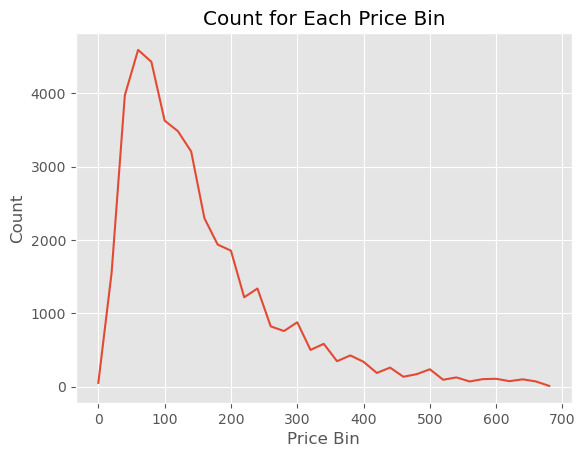

In [46]:
sns.lineplot(x = price_bin_grouping.index, y = 'count', data=price_bin_grouping)
plt.title('Count for Each Price Bin')
plt.xlabel('Price Bin')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

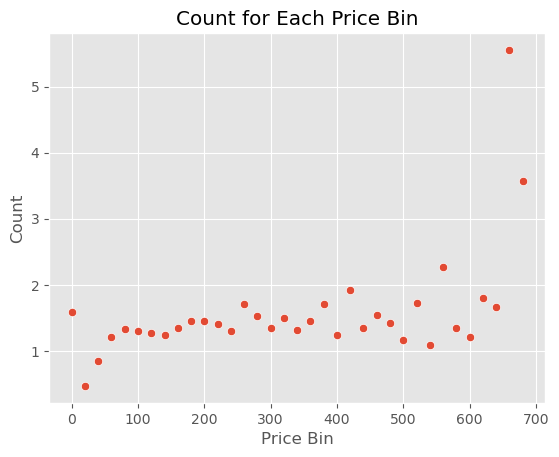

In [47]:
sns.scatterplot(x = price_bin_grouping.index, y = 'reviews_per_month', data=price_bin_grouping)
plt.title('Count for Each Price Bin')
plt.xlabel('Price Bin')
plt.ylabel('Average Reviews Per Month')